In [80]:
import pandas as pd

df = pd.read_csv('/content/predictive_maintenance.csv')

In [81]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [85]:
sns.set_theme(palette='tab10',
              font = 'Lucida Calligraphy',
              font_scale=1.5,
              rc = None)
import matplotlib
matplotlib.rcParams.update({'font.size':15})

plt.style.use('dark_background')

In [86]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [87]:
df = df.drop(['UDI','Product ID'], axis=1)

In [88]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [89]:
df['Air temperature [K]'] = df['Air temperature [K]'] - 272.15
df['Process temperature [K]'] = df['Process temperature [K]'] - 272.15

df.rename(columns={"Air temperature [K]": "Air temperature [°C]", "Process temperature [K]": "Process temperature [°C]"}, inplace=True)

In [90]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]

In [91]:
df.head()

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,M,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,L,26.05,36.55,1408,46.3,3,0,No Failure,10.5
2,L,25.95,36.35,1498,49.4,5,0,No Failure,10.4
3,L,26.05,36.45,1433,39.5,7,0,No Failure,10.4
4,L,26.05,36.55,1408,40.0,9,0,No Failure,10.5


In [92]:
display(df.shape)

(10000, 9)

In [93]:
display(df.size)

90000

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         10000 non-null  object 
 1   Air temperature [°C]         10000 non-null  float64
 2   Process temperature [°C]     10000 non-null  float64
 3   Rotational speed [rpm]       10000 non-null  int64  
 4   Torque [Nm]                  10000 non-null  float64
 5   Tool wear [min]              10000 non-null  int64  
 6   Target                       10000 non-null  int64  
 7   Failure Type                 10000 non-null  object 
 8   Temperature difference [°C]  10000 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 703.2+ KB


In [95]:
df.describe().style.background_gradient(cmap='magma')

,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature difference [°C]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900,10.000630
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094
min,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000,7.600000
25%,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000,9.300000
50%,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000,9.800000
75%,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000,11.000000
max,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000,12.100000


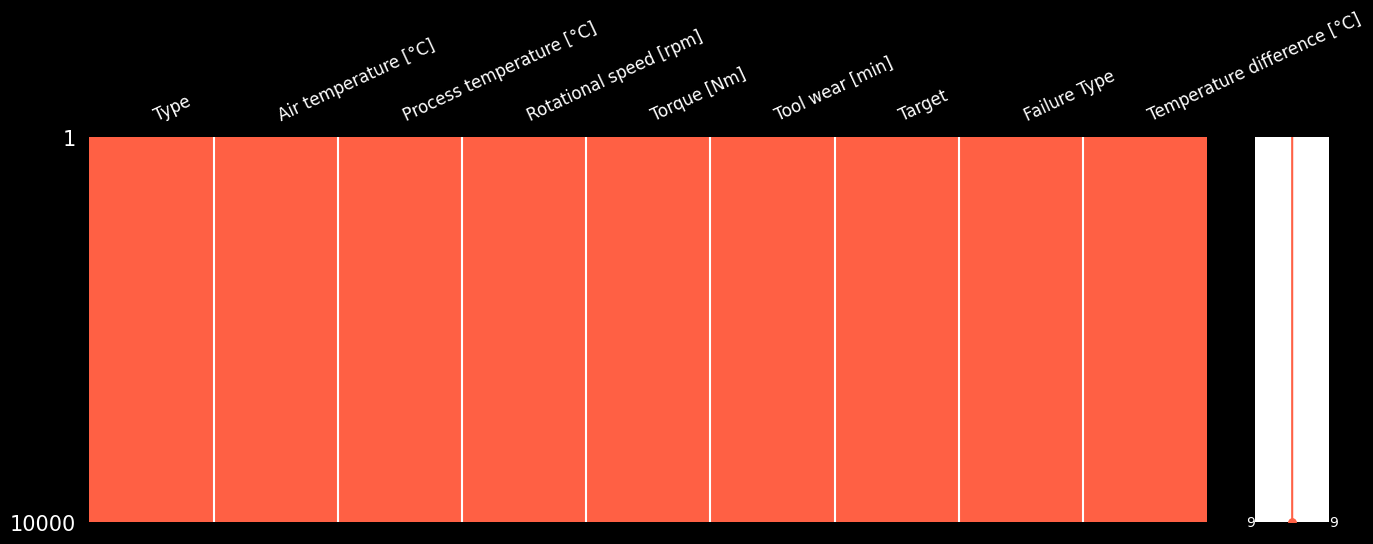

In [96]:
# EDA
import missingno as msno

msno.matrix(df, figsize=(16,5), fontsize=12, color=(1, 0.38, 0.27))
plt.xticks(rotation=25)
plt.show()

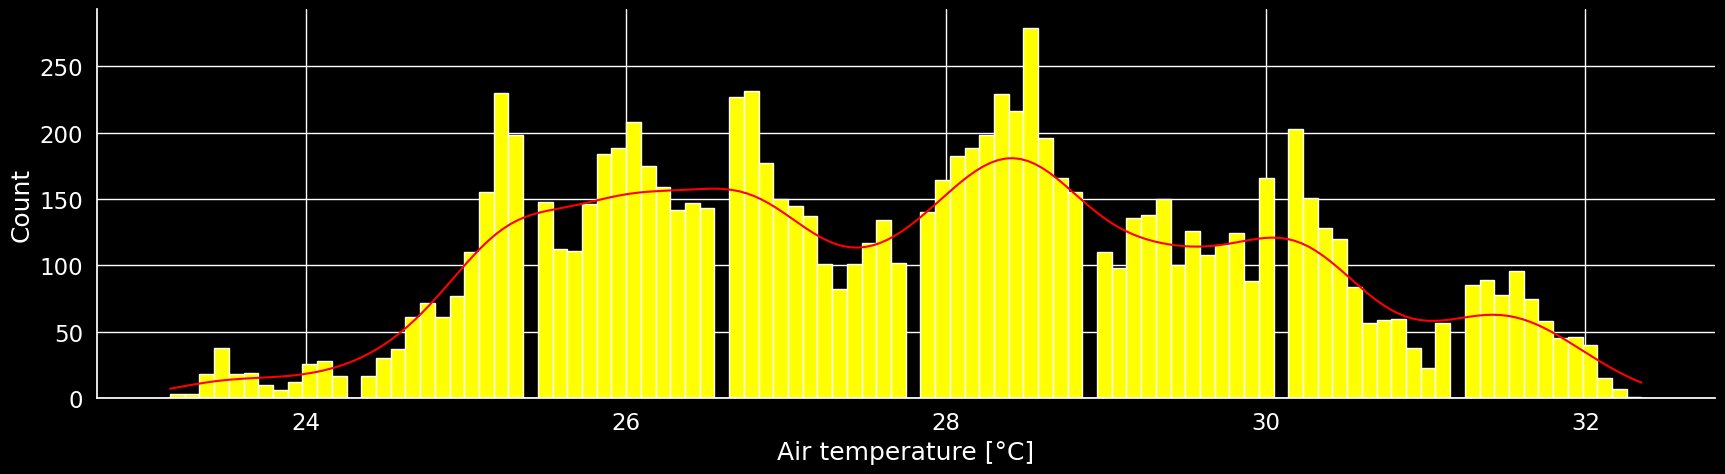

In [97]:
sns.displot(data = df, x = 'Air temperature [°C]', kde=True, bins=100, color='red', facecolor='yellow', height=5, aspect=3.5)
plt.show()

In [98]:
df['Failure Type'].unique() #output failure -> categorical

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [99]:
# Feature Selection:


,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,M,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,L,26.05,36.55,1408,46.3,3,0,No Failure,10.5
2,L,25.95,36.35,1498,49.4,5,0,No Failure,10.4
3,L,26.05,36.45,1433,39.5,7,0,No Failure,10.4
4,L,26.05,36.55,1408,40.0,9,0,No Failure,10.5


In [101]:
pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.5 MB/s eta 0:00:00


In [103]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type', 'Failure Type'])

df = encoder.fit_transform(df)
df.head()

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,1,25.95,36.45,1551,42.8,0,0,1,10.5
1,2,26.05,36.55,1408,46.3,3,0,1,10.5
2,2,25.95,36.35,1498,49.4,5,0,1,10.4
3,2,26.05,36.45,1433,39.5,7,0,1,10.4
4,2,26.05,36.55,1408,40.0,9,0,1,10.5


In [104]:
df['Failure Type'].unique()

array([1, 2, 3, 4, 5, 6])

In [105]:
df['Type'].unique()

array([1, 2, 3])

In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Failure Type'] = le.fit_transform(df['Failure Type'])

In [109]:
df['Failure Type'].unique()

array([0, 1, 2, 3, 4, 5])

In [110]:
# select input / output featrues
X = df.drop(columns='Failure Type', axis=1)
y = df['Failure Type']

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=21)

In [118]:
print(X_train.shape)
print(y_train.shape)

# predtict - test
print(X_test.shape)

#evaluate - y_test
print(y_test.shape)

(8000, 8)
(2000, 8)
(8000,)
(2000,)


In [122]:
# Logistic regression:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#created the model
lreg_model = LogisticRegression()
#train the model
lreg_model.fit(X_train, y_train)
#Predict model output based test data
lreg_pred = lreg_model.predict(X_test)


In [126]:
lreg_train_score = round(lreg_model.score(X_train, y_train)* 100, 2)
lreg_model_accuracy = round(accuracy_score(lreg_pred, y_test) * 100, 2)

print("Training Accuracy: ",lreg_train_score)
print("LR Model Accuracy: ",lreg_model_accuracy)

print(classification_report(lreg_pred, y_test))

Training Accuracy:  96.75
LR Model Accuracy:  96.25
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1990
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.38      0.67      0.48         9
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1

    accuracy                           0.96      2000
   macro avg       0.23      0.27      0.24      2000
weighted avg       1.00      0.96      0.98      2000



In [127]:
#KNN:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#model create

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

#test
knn_pred = knn.predict(X_test)

knn_train_score = round(knn.score(X_train, y_train)* 100, 2)
knn_model_accuracy = round(accuracy_score(knn_pred, y_test) * 100, 2)

print("Training Accuracy: ",knn_train_score)
print("LR Model Accuracy: ",knn_model_accuracy)

print(classification_report(knn_pred, y_test))

Training Accuracy:  97.31
LR Model Accuracy:  96.5
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1982
           1       0.37      0.78      0.50         9
           2       0.00      0.00      0.00         0
           3       0.38      0.75      0.50         8
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1

    accuracy                           0.96      2000
   macro avg       0.29      0.42      0.33      2000
weighted avg       0.99      0.96      0.98      2000



In [131]:
knn.predict([[2,30.05,39.35,1548,32.4,81,0,9.3]])

array([0])

In [134]:
# DT
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

dt_train_score = round(knn.score(X_train, y_train)* 100, 2)
dt_model_accuracy = round(accuracy_score(dt_pred, y_test) * 100, 2)

print("Training Accuracy: ",dt_train_score)
print("LR Model Accuracy: ",dt_model_accuracy)

print(classification_report(dt_pred, y_test))

Training Accuracy:  97.31
LR Model Accuracy:  99.35
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1921
           1       0.89      0.85      0.87        20
           2       1.00      0.82      0.90        11
           3       0.75      0.92      0.83        13
           4       0.00      0.00      0.00         3
           5       0.97      0.97      0.97        32

    accuracy                           0.99      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.99      0.99      0.99      2000



In [ ]:
K-Nearest Neighbors (KNN) is classified as what type of machine learning algorithm?
a) Instance-based learning
b) Parametric learning
c) Non-parametric learning
d) Model-based learning

In [ ]:
Which of the following statements is false about Ensemble learning?
a) It is a supervised learning algorithm
b) It is an unsupervised learning algorithm
c) More random algorithms can be used to produce a stronger ensemble
d) Ensembles can be shown to have more flexibility in the functions they can represent